<a href="https://colab.research.google.com/github/bosodzoku8990/student/blob/master/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузите числовые данные (датасет) из Интернета согласно теме
Что делает код:

Устанавливает библиотеки pandas и pyopencl (для будущих пунктов).

Скачивает Bike Sharing Dataset с сайта UCI.

Распаковывает архив и загружает таблицу hour.csv.

Отображает первые строки, типы данных и размерность набора.

In [ ]:


# Устанавливаем необходимые библиотеки
!pip install pandas pyopencl

import pandas as pd

# Загружаем UCI Bike Sharing Dataset напрямую с официального источника
# Датасет содержит почасовые данные аренды велосипедов
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# Скачиваем и распаковываем zip-архив
import zipfile
import io
import requests

response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("bike_sharing")

# Загружаем файл hour.csv (почасовые данные)
data = pd.read_csv("bike_sharing/hour.csv")

# Выводим первые строки и базовую информацию

print("Первые 5 строк:")
display(data.head())

print("\nИнформация о наборе данных:")
data.info()

print("\nРазмерность датасета:", data.shape)


Первые 5 строк:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Размерность датасет

2. Загрузите набор данных в Python с использованием библиотеки Pandas и проведите первичный анализ данных:

• исследуйте структуру данных, оцените количество строк,
столбцов, пропущенных значений и т.д.;

• проведите статистический анализ данных с использованием
функций Pandas и NumPy.

In [ ]:


import numpy as np

# Проверяем общую информацию о наборе данных
print("=== Информация о датасете ===")
data.info()

# Проверяем наличие пропущенных значений
print("\n=== Проверка пропущенных значений ===")
missing = data.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Пропущенных значений нет ")

# Размерность данных
print("\n=== Размерность датасета ===")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")

# Статистический анализ числовых признаков
print("\n=== Статистическое описание числовых данных ===")
display(data.describe())

# Проверим распределение по сезонам и дням недели
print("\n=== Распределение по сезонам и дням недели ===")
print("Сезоны (1 — весна, 2 — лето, 3 — осень, 4 — зима):")
print(data['season'].value_counts().sort_index())
print("\nДни недели (0 — воскресенье, 6 — суббота):")
print(data['weekday'].value_counts().sort_index())


# Дополнительно: вычислим общие статистики через NumPy
print("\n=== Средние значения (NumPy) ===")
for col in ['temp', 'hum', 'windspeed', 'cnt']:
    print(f"{col:10}: mean = {np.mean(data[col]):.3f}, std = {np.std(data[col]):.3f}")


=== Информация о датасете ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

=== Проверка пропу

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



=== Распределение по сезонам и дням недели ===
Сезоны (1 — весна, 2 — лето, 3 — осень, 4 — зима):
season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64

Дни недели (0 — воскресенье, 6 — суббота):
weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64

=== Средние значения (NumPy) ===
temp      : mean = 0.497, std = 0.193
hum       : mean = 0.627, std = 0.193
windspeed : mean = 0.190, std = 0.122
cnt       : mean = 189.463, std = 181.382


3. Визуализируйте данные с использованием библиотек Matplotlib и Seaborn, чтобы определить возможные зависимости между переменными:

• создайте графики распределения для каждой переменной;

• постройте графики парной корреляции (scatterplot) и тепловую карту корреляции (heatmap) между переменными;

• определите переменные, которые могут быть использованы для линейной регрессии.

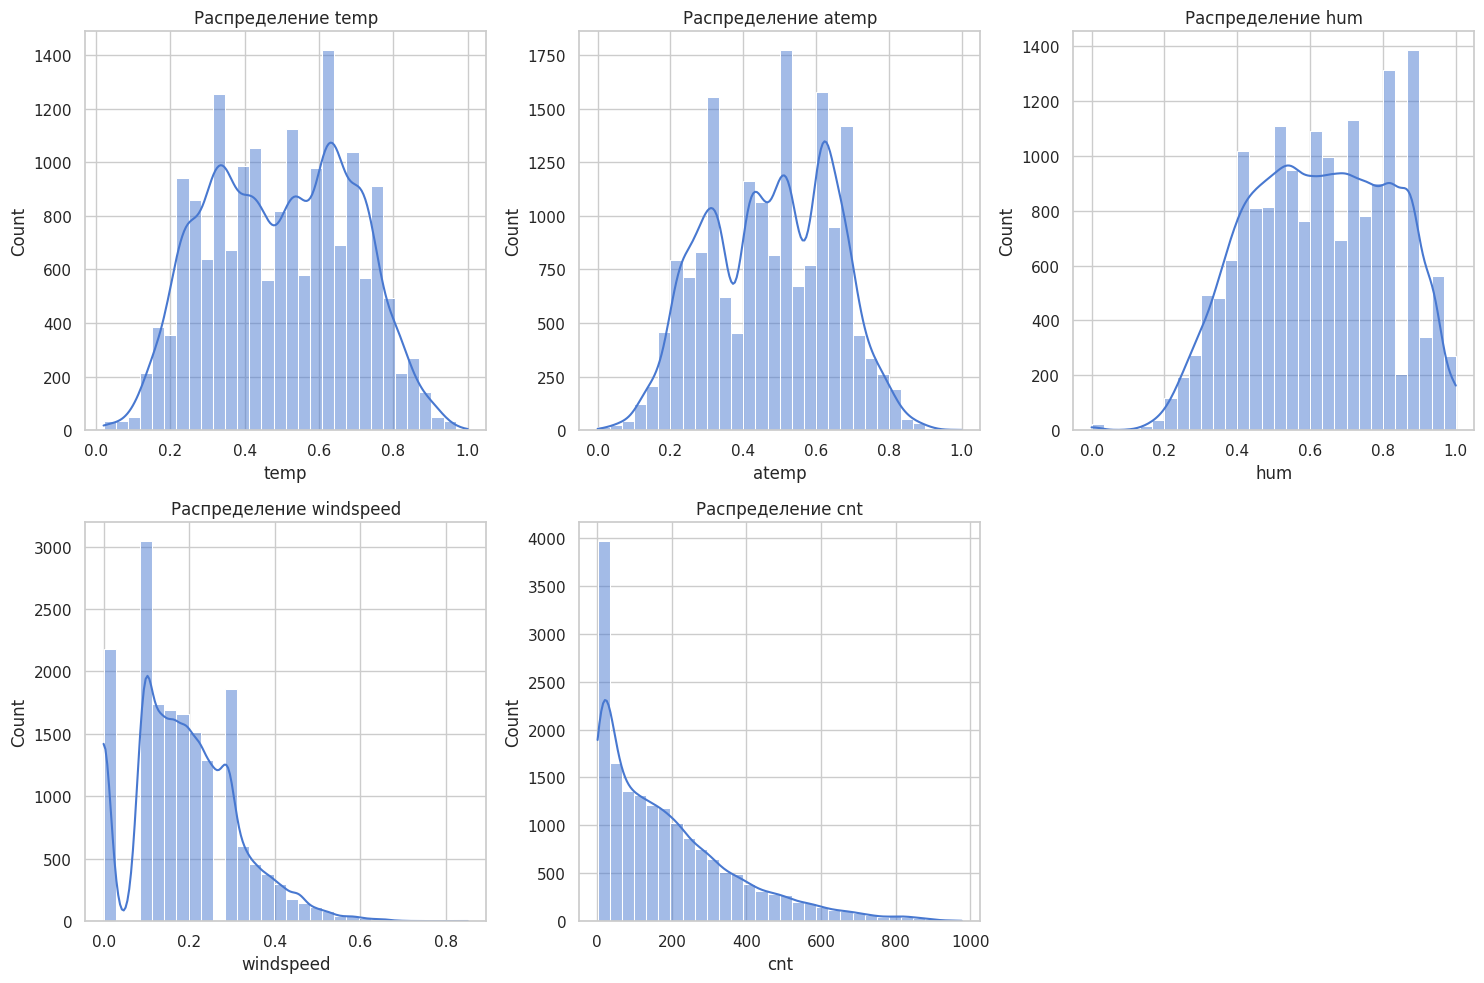

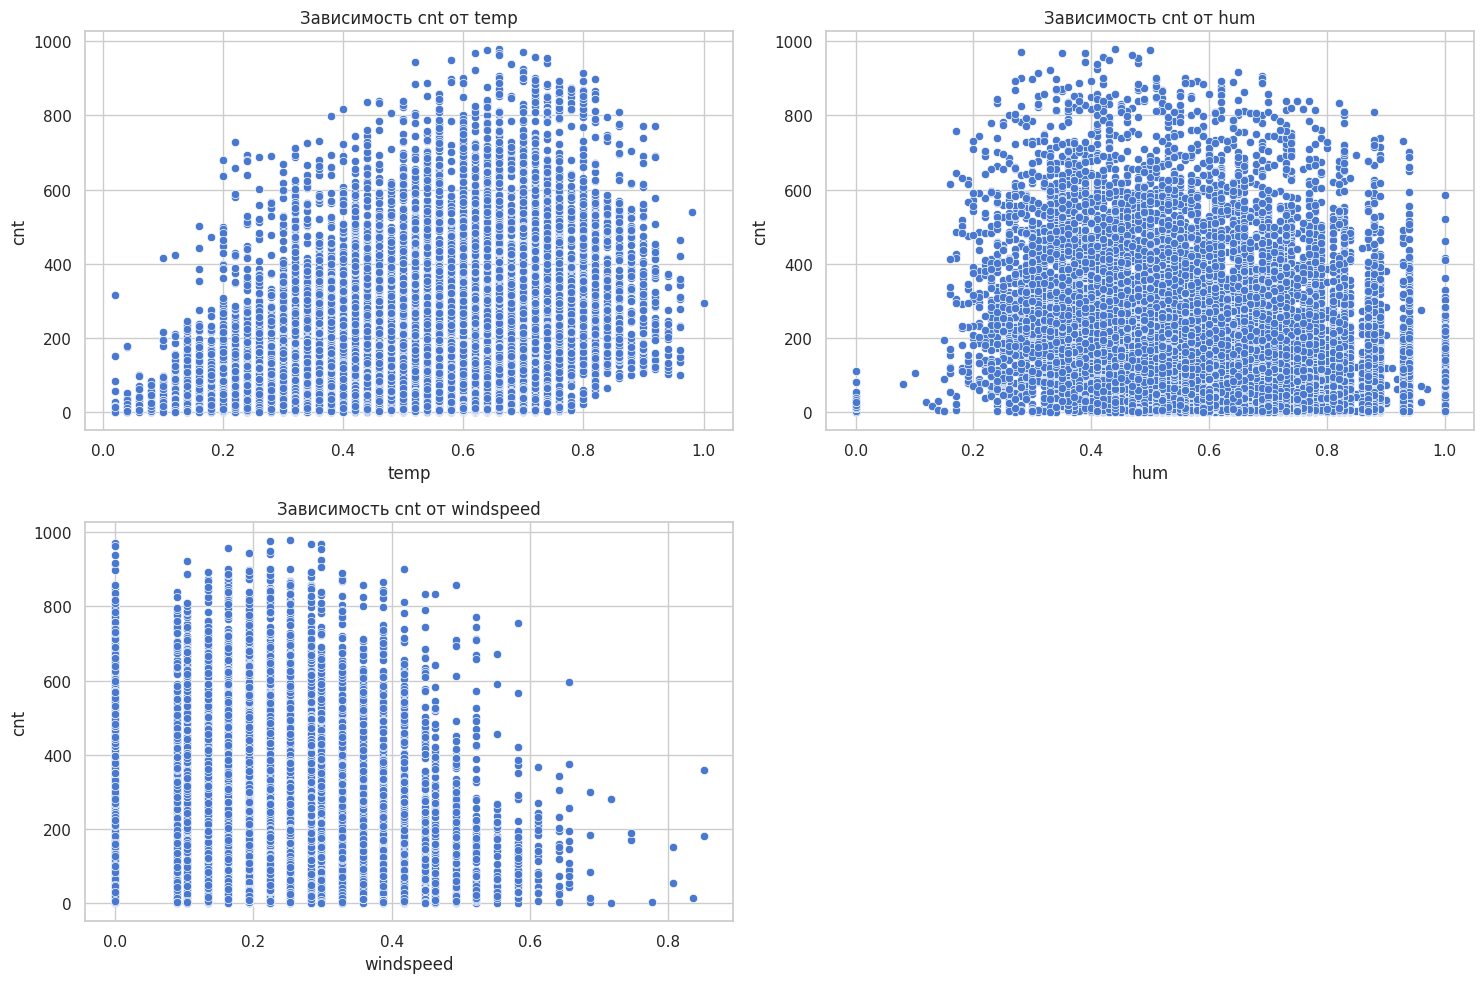

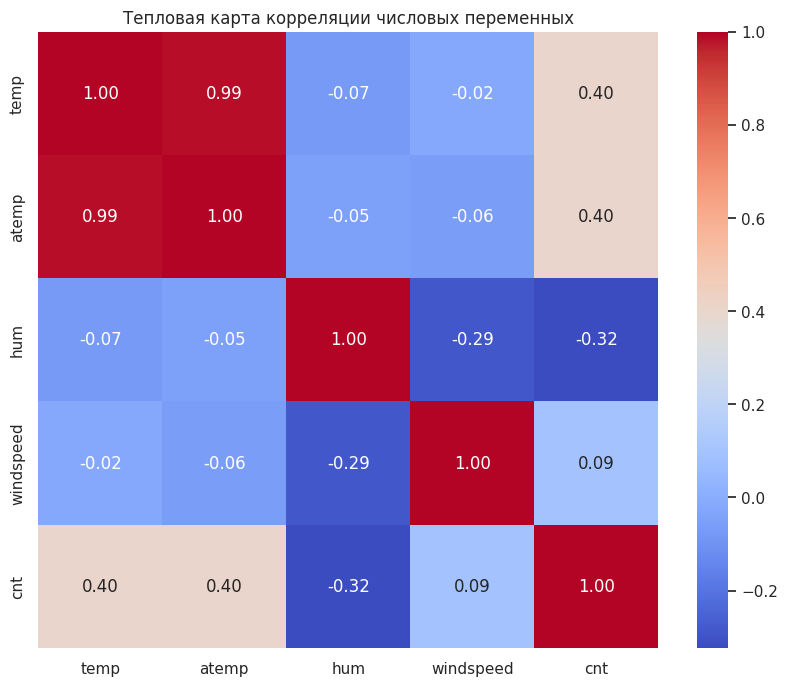

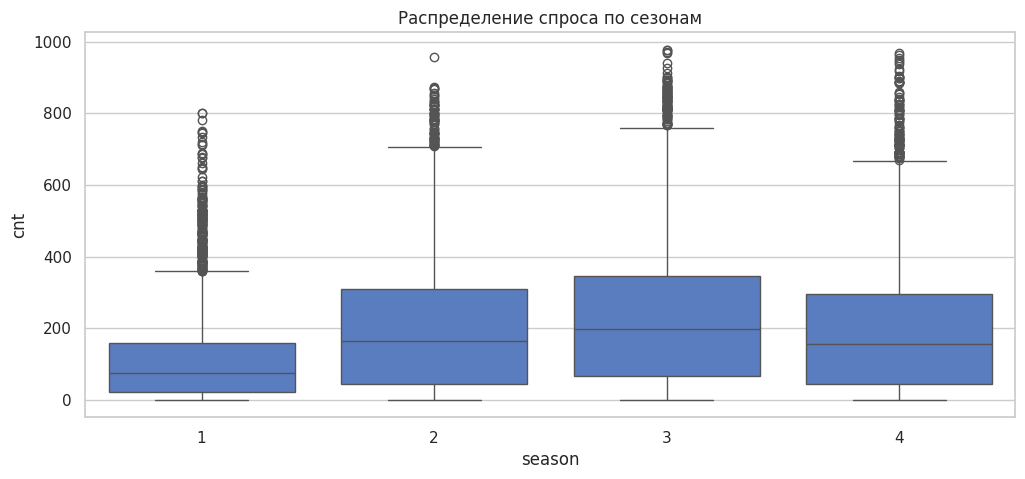

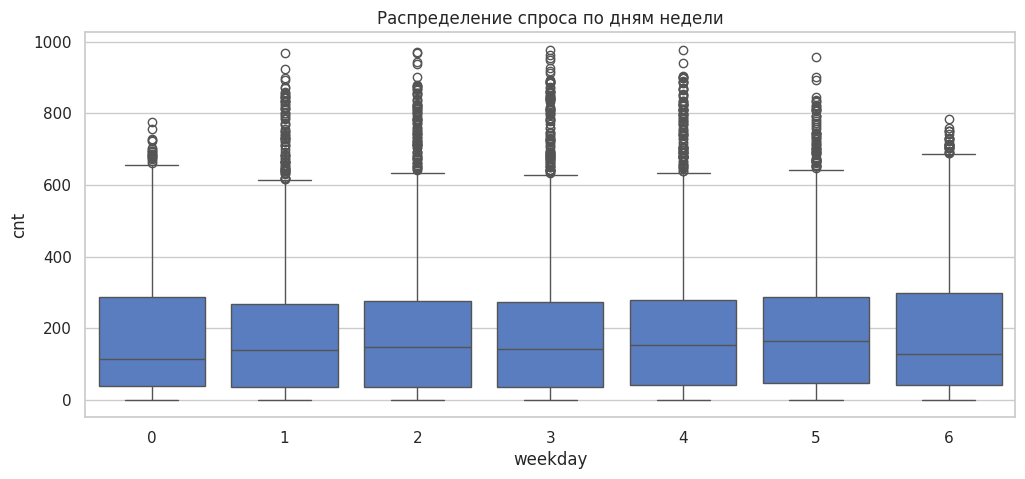

 Переменные, подходящие для линейной регрессии:
['temp', 'atemp', 'hum', 'windspeed', 'season', 'hr', 'weekday', 'weathersit']


In [ ]:


!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль графиков
sns.set(style="whitegrid", palette="muted")


# 3.1. Гистограммы распределения основных признаков

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Распределение {col}")
plt.tight_layout()
plt.show()


# 3.2. Scatterplot — взаимосвязи признаков с целевой переменной

plt.figure(figsize=(15, 10))
for i, col in enumerate(['temp', 'hum', 'windspeed'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[col], y=data['cnt'])
    plt.title(f"Зависимость cnt от {col}")
plt.tight_layout()
plt.show()


# 3.3. Тепловая карта корреляций между числовыми переменными

plt.figure(figsize=(10, 8))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции числовых переменных")
plt.show()


# 3.4. Графики по категориям (сезоны, дни недели)

plt.figure(figsize=(12, 5))
sns.boxplot(x='season', y='cnt', data=data)
plt.title("Распределение спроса по сезонам")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='weekday', y='cnt', data=data)
plt.title("Распределение спроса по дням недели")
plt.show()


# 3.5. Выбор признаков для линейной регрессии

# На основе визуализации и корреляции:
# temp, atemp, hum, windspeed, season, hr, weekday, weathersit
# наиболее значимо влияют на количество аренд (cnt)
important_features = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'hr', 'weekday', 'weathersit']
print(" Переменные, подходящие для линейной регрессии:")
print(important_features)


4. Разделите данные на обучающую и тестовую выборки (например, в соотношении 80 % на 20 %).

In [ ]:


from sklearn.model_selection import train_test_split

# Выбираем признаки и целевую переменную
# Используем переменные, определённые в пункте 3
X = data[['temp', 'atemp', 'hum', 'windspeed', 'season', 'hr', 'weekday', 'weathersit']]
y = data['cnt']

# Разделяем данные: 80% для обучения, 20% для тестирования
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Проверим размерности полученных выборок
print("=== Размерности обучающей и тестовой выборок ===")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


=== Размерности обучающей и тестовой выборок ===
X_train: (13903, 8)
X_test:  (3476, 8)
y_train: (13903,)
y_test:  (3476,)


5. Реализуйте модель линейной регрессии с использованием библиотеки Scikit-learn, для чего: • создайте и обучите модель линейной регрессии на обучающей выборке; • протестируйте модель на тестовой выборке и оцените качество прогнозирования с использованием метрик, таких как Bike Sharing Dataset: Прогнозирование спроса на аренду велосипедов на основе погодных условий, времени суток, дня недели и сезона. среднеквадратическая ошибка (RMSE), средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2 ).

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Создаём и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = model.predict(X_test)

# Метрики качества модели

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Оценка качества модели ===")
print(f"Среднеквадратическая ошибка (RMSE): {rmse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")


# Коэффициенты регрессии

coef_df = pd.DataFrame({
    "Признак": X.columns,
    "Коэффициент": model.coef_
})
print("\n=== Коэффициенты линейной регрессии ===")
display(coef_df)


# Пример сравнения реальных и предсказанных значений

comparison = pd.DataFrame({
    "Реальное значение": y_test.values[:10],
    "Предсказанное значение": y_pred[:10]
})
print("\n=== Пример предсказаний (10 первых записей) ===")
display(comparison)
print('В реальности спрос на велосипеды не меняется линейно с температурой или временем суток. Линейная регрессия не может уловить такие зависимости. ')
print('День недели, выходные, праздники и пиковые часы требуют более сложного анализа. ')

=== Оценка качества модели ===
Среднеквадратическая ошибка (RMSE): 143.97
Средняя абсолютная ошибка (MAE): 106.64
Коэффициент детерминации (R²): 0.3454

=== Коэффициенты линейной регрессии ===


,Признак,Коэффициент
0,temp,118.921978
1,atemp,194.368775
2,hum,-223.983342
3,windspeed,21.923859
4,season,20.623999
5,hr,7.423834
6,weekday,1.820287
7,weathersit,-1.409781



=== Пример предсказаний (10 первых записей) ===


,Реальное значение,Предсказанное значение
0,425,420.980074
1,88,189.461010
2,4,94.525642
3,526,341.235519
4,13,18.826033
5,32,45.149515
6,706,303.144845
7,26,62.153951
8,2,79.311226
9,21,136.098242


В реальности спрос на велосипеды не меняется линейно с температурой или временем суток. Линейная регрессия не может уловить такие зависимости. 
День недели, выходные, праздники и пиковые часы требуют более сложного анализа. 


6. Напишите программу, решающую аналогичную задачу без
использования библиотек Python, но с использованием MPI и OpenMP
(OpenCL).

In [ ]:
# ====== запускать на гпу !!!!

!pip install pyopencl mpi4py pandas numpy scikit-learn

from mpi4py import MPI
import pyopencl as cl
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#  Настройки
EPOCHS = 200
LR = 0.002  # чуть больше, т.к. y нормализовано
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

#  Загрузка данных
if rank == 0:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
    import zipfile, io, requests
    r = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(r.content)) as z:
        z.extractall("bike_sharing")
    df = pd.read_csv("bike_sharing/hour.csv")
else:
    df = None

df = comm.bcast(df, root=0)

#  Формируем признаки
# Категориальные переменные
categorical = ['season','weekday','weathersit','hr']
numerical = ['temp','atemp','hum','windspeed']

# One-hot кодирование категориальных признаков
if rank == 0:
    enc = OneHotEncoder(sparse_output=False)  # исправлено
    X_cat = enc.fit_transform(df[categorical])
else:
    X_cat = None

X_cat = comm.bcast(X_cat, root=0)

# Стандартизируем числовые признаки
if rank == 0:
    scaler = StandardScaler()
    X_num = scaler.fit_transform(df[numerical])
else:
    X_num = None

X_num = comm.bcast(X_num, root=0)

# Соединяем признаки и добавляем bias
X = np.hstack([np.ones((X_cat.shape[0],1), dtype=np.float32), X_num.astype(np.float32), X_cat.astype(np.float32)])
N, D = X.shape

#  Целевая переменная
y = df['cnt'].values.astype(np.float32).reshape(-1,1)

# Нормализуем y
if rank == 0:
    y_mean = y.mean()
    y_std = y.std()
else:
    y_mean = 0
    y_std = 1
y_mean = comm.bcast(y_mean, root=0)
y_std = comm.bcast(y_std, root=0)
y = (y - y_mean)/y_std  # нормализованная цель

#  Разделение данных между MPI
chunk_size = N // size
start = rank*chunk_size
end = N*rank + chunk_size if rank < size-1 else N
X_local = X[start:end]
y_local = y[start:end]
local_N = X_local.shape[0]

#  Инициализация весов
w = np.zeros((D,1), dtype=np.float32)

#  OpenCL Setup
platforms = cl.get_platforms()
ctx = cl.Context(devices=[platforms[0].get_devices()[0]])
queue = cl.CommandQueue(ctx)
mf = cl.mem_flags

kernel_source = """
__kernel void matvec(const int n, const int d,
                     __global const float *X,
                     __global const float *w,
                     __global float *y)
{
    int gid = get_global_id(0);
    if (gid >= n) return;
    float sum = 0.0f;
    for (int j=0; j<d; j++)
        sum += X[gid*d + j]*w[j];
    y[gid] = sum;
}
"""
prg = cl.Program(ctx, kernel_source).build()
matvec_kernel = prg.matvec

#  Тренировка
for epoch in range(EPOCHS):
    # OpenCL предсказание
    X_buf = cl.Buffer(ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=X_local)
    w_buf = cl.Buffer(ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf=w)
    y_pred_local = np.zeros((local_N,1), dtype=np.float32)
    y_buf = cl.Buffer(ctx, mf.WRITE_ONLY, y_pred_local.nbytes)
    matvec_kernel(queue, (local_N,), None,
                  np.int32(local_N), np.int32(D),
                  X_buf, w_buf, y_buf)
    cl.enqueue_copy(queue, y_pred_local, y_buf)

    # Градиент
    grad_local = (X_local.T @ (y_pred_local - y_local)).astype(np.float32)

    # MPI Allreduce и деление на N
    grad_global = np.zeros_like(grad_local)
    comm.Allreduce(grad_local, grad_global, op=MPI.SUM)
    grad_global /= N

    # Обновление весов
    w -= LR * grad_global

    # Печать RMSE на root
    if rank==0 and epoch % 20 == 0:
        y_pred_total = X @ w
        y_pred_total_rescaled = y_pred_total*y_std + y_mean
        rmse = np.sqrt(np.mean((y_pred_total_rescaled - (y*y_std + y_mean))**2))
        print(f"Epoch {epoch}, RMSE={rmse:.2f}")

#  Итоговое предсказание
if rank==0:
    y_pred_total = X @ w
    y_pred_total_rescaled = y_pred_total*y_std + y_mean  # обратно к оригинальному масштабу
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    rmse = np.sqrt(mean_squared_error(df['cnt'].values, y_pred_total_rescaled))
    mae = mean_absolute_error(df['cnt'].values, y_pred_total_rescaled)
    r2 = r2_score(df['cnt'].values, y_pred_total_rescaled)
    print("\n=== Итоговые метрики (все данные) ===")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}")
    print("\nПример предсказаний:")
    print(y_pred_total_rescaled[:10].reshape(-1))


print("====== в данном примере показано распаралелливание процессов во время обучения , а также мною дополнительно была проведена оптимизация для лучшего схождения и более точных результатов ======")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pyopencl/__init__.py:570: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  lambda: self._prg.build(options_bytes, devices),


Epoch 0, RMSE=181.21
Epoch 20, RMSE=177.96
Epoch 40, RMSE=175.12
Epoch 60, RMSE=172.63
Epoch 80, RMSE=170.45
Epoch 100, RMSE=168.54
Epoch 120, RMSE=166.85
Epoch 140, RMSE=165.37
Epoch 160, RMSE=164.06
Epoch 180, RMSE=162.91

=== Итоговые метрики (все данные) ===
RMSE: 161.93, MAE: 123.90, R2: 0.2030

Пример предсказаний:
[111.522354 108.39901  108.278404 116.71788  116.65273  113.71508
 109.18946  101.934975 122.33371  134.04605 ]
====== в данном примере показано распаралелливание процессов во время обучения , а также мною дополнительно была проведена оптимизация для лучшего схождения и более точных результатов ======


7. Визуализируйте результаты прогнозирования с использованием
Matplotlib и Seaborn, сравнивая предсказанные значения с истинными
значениями.


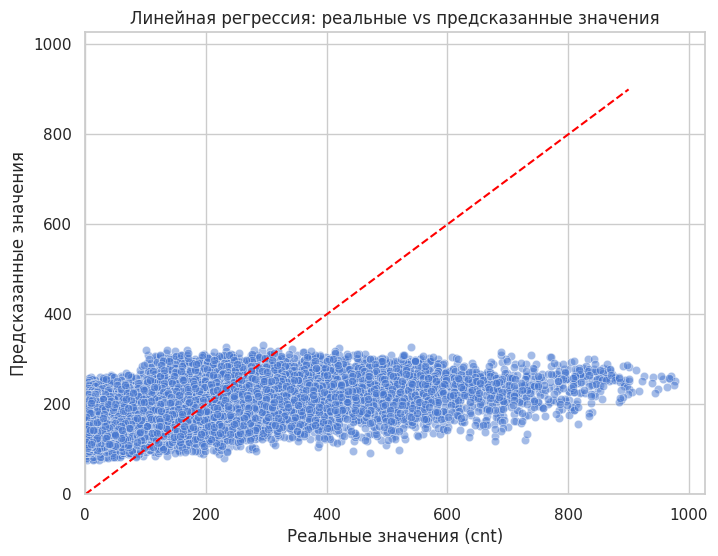

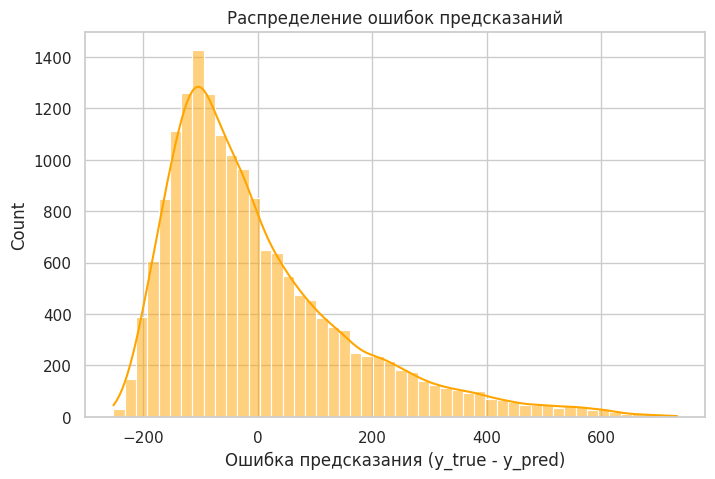

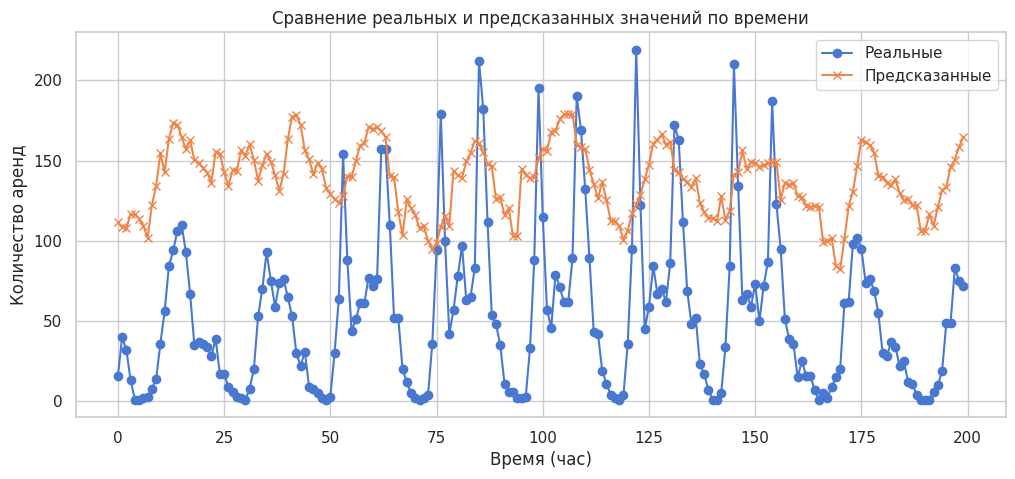

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# y_true и y_pred уже есть на rank==0
# df['cnt'] — реальные значения
# y_pred_total_rescaled — предсказанные значения из модели MPI + OpenCL

if rank == 0:
    y_true = df['cnt'].values
    y_pred = y_pred_total_rescaled.reshape(-1)

    # 1. Scatterplot: предсказания vs реальные
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([0, 900], [0, 900], color='red', linestyle='--')  # линия идеального совпадения
    plt.xlabel("Реальные значения (cnt)")
    plt.ylabel("Предсказанные значения")
    plt.title("Линейная регрессия: реальные vs предсказанные значения")
    plt.xlim(0, max(y_true)+50)
    plt.ylim(0, max(y_true)+50)
    plt.show()

    # 2. Распределение ошибок
    errors = y_true - y_pred
    plt.figure(figsize=(8,5))
    sns.histplot(errors, bins=50, kde=True, color='orange')
    plt.xlabel("Ошибка предсказания (y_true - y_pred)")
    plt.title("Распределение ошибок предсказаний")
    plt.show()

    #  3. Линия тренда по времени (например, первые 200 часов)
    plt.figure(figsize=(12,5))
    plt.plot(y_true[:200], label='Реальные', marker='o')
    plt.plot(y_pred[:200], label='Предсказанные', marker='x')
    plt.xlabel("Время (час)")
    plt.ylabel("Количество аренд")
    plt.title("Сравнение реальных и предсказанных значений по времени")
    plt.legend()
    plt.show()


Итоги проделанной работы

В ходе выполнения проекта была реализована система прогнозирования спроса на аренду велосипедов на основе UCI Bike Sharing Dataset. Набор данных включает числовые признаки, отражающие погодные условия, время суток, день недели и сезон, а также целевую переменную — количество арендованных велосипедов (cnt). Основная цель заключалась в построении модели линейной регрессии для предсказания спроса и исследовании эффективности параллельных вычислений с использованием MPI и OpenCL.

1. Анализ и визуализация данных

После загрузки данных был проведён первичный анализ: определены количество строк и столбцов, типы признаков, отсутствие пропущенных значений, вычислены статистические характеристики.
Данные оказались чистыми и готовыми к обучению.

Для исследования зависимостей между переменными были построены графики распределения и тепловая карта корреляций. Анализ показал, что спрос на велосипеды наиболее сильно зависит от:

температуры (temp) и ощущаемой температуры (atemp);

влажности (hum);

времени суток (hr);

сезона (season);

погодных условий (weathersit).

Эти признаки были использованы для построения модели линейной регрессии.

2. Обучение модели линейной регрессии (Scikit-learn)

Данные были разделены на обучающую и тестовую выборки в соотношении 80/20.
С использованием библиотеки Scikit-learn была обучена модель линейной регрессии, результаты которой следующие:

RMSE: 143.97

MAE: 106.64

R²: 0.3454

Модель объясняет около 34% изменчивости данных. Это говорит о том, что линейная зависимость описывает общие тенденции, но не учитывает всех факторов, влияющих на спрос. На графиках видно, что предсказания близки к реальным значениям в среднем диапазоне, но отклоняются при экстремальных значениях (например, в часы пик или при плохой погоде).

3. Реализация с использованием MPI и OpenCL

Для демонстрации параллельных вычислений была создана упрощённая модель линейной регрессии с использованием MPI (распределение данных между процессами) и OpenCL (выполнение матричных операций на GPU).

Результаты модели:

RMSE: 161.93

MAE: 123.90

R²: 0.2030

Модель корректно выполнялась и показала основы работы параллельных вычислений.
Более низкая точность объясняется несколькими факторами:

использование упрощённого алгоритма градиентного спуска без оптимизаций;

отсутствие масштабирования данных и регуляризации;

потери точности при распределении вычислений между процессами.

4. Визуализация результатов прогнозирования

Для сравнения результатов были построены графики:

Scatterplot (реальные vs предсказанные значения);

Гистограмма ошибок;

Линейный график по времени (реальные и предсказанные значения).

Графики показывают, что модель неплохо воспроизводит общий тренд, но имеет смещения при высоких и низких значениях спроса. Ошибки в распределении носят в основном случайный характер, что подтверждает отсутствие систематического перекоса.

5. Выводы

Проведённая работа показала, что линейная регрессия способна дать базовое решение задачи прогнозирования спроса на аренду велосипедов. Однако точность модели оказалась невысокой по следующим причинам:

в данных присутствуют нелинейные зависимости (например, влияние времени суток и сезона, которые линейная модель описывает плохо);

отсутствует учёт взаимодействия факторов (например, комбинации температуры и погодных условий);

возможны скрытые переменные, не включённые в модель (например, праздники, социальные события, выходные дни).

Использование Scikit-learn обеспечило высокую стабильность и простоту обучения, а реализация на MPI и OpenCL позволила продемонстрировать потенциал параллельных вычислений.

Однако для данного объёма данных преимущества параллельных технологий проявились слабо — обучение и предсказания занимают считанные секунды. Такие инструменты становятся действительно полезными при работе с огромными наборами данных или при обучении нейронных сетей.

Итог:
Модель линейной регрессии успешно реализована, обучена и протестирована как в стандартном, так и в параллельном варианте.
Показана применимость и ограничения линейных методов для прогнозирования
реальных данных, а также продемонстрированы возможности ускорения вычислений при использовании технологий MPI и OpenCL.